#PROYECTO PARTE I

##RESUMEN


En este proyecto se evaluaron tres modelos de clasificación: Regresión Logística, Árboles de Decisión y Random Forest, para predecir el rendimiento académico estudiantil utilizando datos académicos y personales.

El conjunto de datos analizados incluye variables como días de ausencia, horas de autoestudio, puntuaciones en varias materias, aspiraciones profesionales y el promedio académico. La variable objetivo es 'rendimiento', que toma valores 0 o 1 e indica si el estudiante tiene alto o bajo rendimiento académico.

Para definir el alto rendimiento, se estableció un umbral basado en la media más la desviación estándar del promedio general, dado que este presentaba una distribución normal.

Se destacaron como hallazgos significativos factores como las horas de autoestudio semanal y la correlación positiva entre todas las asignaturas y el promedio general. Se observaron notas más altas en Matemáticas y una mayor variabilidad en Biología.

El modelo de árbol de decisión se destacó como el más efectivo para predecir el rendimiento, permitiendo identificar con precisión a estudiantes con alto potencial y áreas específicas que requieren intervención para mejorar el rendimiento académico general.


##OBJETIVO

El objetivo principal de este proyecto es desarrollar un modelo de clasificación que permita predecir el rendimiento académico de los estudiantes basado en diversas características. Esto permitirá a los educadores identificar a los estudiantes con alto potencial de rendimiento y a aquellos que podrían necesitar intervenciones adicionales para mejorar sus resultados académicos. Al proporcionar recomendaciones personalizadas basadas en datos concretos, se busca mejorar el rendimiento académico general de la institución y maximizar las oportunidades de los estudiantes para obtener becas y otros beneficios.

Este proyecto se centrará en evaluar modelos de aprendizaje automático que mejor expliquen el fenómeno planteado en este objetivo específico.


##CONTEXTO COMERCIAL

El proyecto se centra en el "Instituto de Excelencia Académica" (IEA), una institución educativa ficticia comprometida con proporcionar educación de calidad y personalizada. El IEA enfrenta el desafío de identificar efectivamente a los estudiantes con alto potencial académico y aquellos que podrían necesitar intervenciones adicionales para mejorar su rendimiento. Además, busca apoyar a los estudiantes en la obtención de becas y otros beneficios académicos mediante técnicas de aprendizaje automático.

El modelo de predicción desarrollado ayudará al IEA a:

- Identificar estudiantes con altas probabilidades de obtener becas.
- Ofrecer recomendaciones personalizadas para mejorar el rendimiento académico.
- Guiar a los estudiantes en la preparación de solicitudes de becas, resaltando sus fortalezas y logros.
- Optimizar recursos educativos y de apoyo, enfocándolos en estudiantes con mayor potencial y necesidad.

Este enfoque no solo beneficiará a los estudiantes en su búsqueda de becas, sino que también elevará el prestigio del IEA como una institución que promueve la excelencia académica y apoya activamente a sus estudiantes en la consecución de sus metas académicas y profesionales.


##HIPÓTESIS

Un modelo de aprendizaje automático será capaz de clasificar con precisión si un estudiante pertenece a la categoría de alto rendimiento o bajo rendimiento basado en atributos como el promedio de calificaciones en siete materias y las horas semanales dedicadas al auto-estudio








##ANALISIS DE DATOS

####CARGA DE LIBRERÍAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

####IMPORTACION DE LOS DATOS

In [ ]:
#Monto disco GDrive
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/01-ANTONINI_DATA_SCIENCE/PRE-ENTREGA'
#print(os.getcwd())


Mounted at /content/gdrive
/content/gdrive/MyDrive/01-ANTONINI_DATA_SCIENCE/PRE-ENTREGA


In [ ]:
# Leer archivo CSV en el directorio
csv_file_path = 'student-scores.csv'
df = pd.read_csv(csv_file_path,sep=',', index_col= 'id', na_values='#N/D')

####EXPLORACION DE DATOS

In [ ]:
df.shape

(2000, 16)

Se importaron 2000 filas y 16 columnas

In [ ]:
df.head() ## Primeras filas y ultimas columnas

,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
id,,,,,,,,,,,,,,,,
1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [ ]:
df.columns

Index(['first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

#####CARACTERISTICAS DE LA INFORMACION


*   id: Identificador único de cada estudiante.
*   first_name: Nombre del estudiante.
*   last_name: Apellido del estudiante.
*   email: Dirección de correo electrónico del estudiante.
*   gender: Género del estudiante (masculino/femenino).
*   part_time_job: Indica si el estudiante tiene un trabajo a tiempo parcial (Verdadero/Falso).
*   absence_days: Número de días que el estudiante ha estado ausente.
*   extracurricular_activities: Indica si el estudiante participa en actividades extracurriculares (Verdadero/Falso).
*   weekly_self_study_hours: Número de horas que el estudiante dedica al autoestudio por semana.
*   career_aspiration: carrera aspiracional del estudiante.
*   math_score: Puntuación obtenida por el alumno en matemáticas.
*   History_score: Puntuación obtenida por el alumno en Historia.
*   physics_score: Puntuación obtenida por el estudiante en física.
*   chemistry_score: Puntuación obtenida por el estudiante en química.
*   biology_score: Puntuación obtenida por el estudiante en biología.
*   english_score: Puntuación obtenida por el alumno en inglés.
*   geografía_score: Puntuación obtenida por el estudiante en geografía.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   first_name                  2000 non-null   object
 1   last_name                   2000 non-null   object
 2   email                       2000 non-null   object
 3   gender                      2000 non-null   object
 4   part_time_job               2000 non-null   bool  
 5   absence_days                2000 non-null   int64 
 6   extracurricular_activities  2000 non-null   bool  
 7   weekly_self_study_hours     2000 non-null   int64 
 8   career_aspiration           2000 non-null   object
 9   math_score                  2000 non-null   int64 
 10  history_score               2000 non-null   int64 
 11  physics_score               2000 non-null   int64 
 12  chemistry_score             2000 non-null   int64 
 13  biology_score               2000 non-null   int64 
 1

In [ ]:
#Chequeo duplicados
df.duplicated().sum()

0

No hay duplicados

In [ ]:
#Chequeo valores Nulos
df.isnull().sum()

first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

#####**DISTRIBUCION DE LOS DATOS**

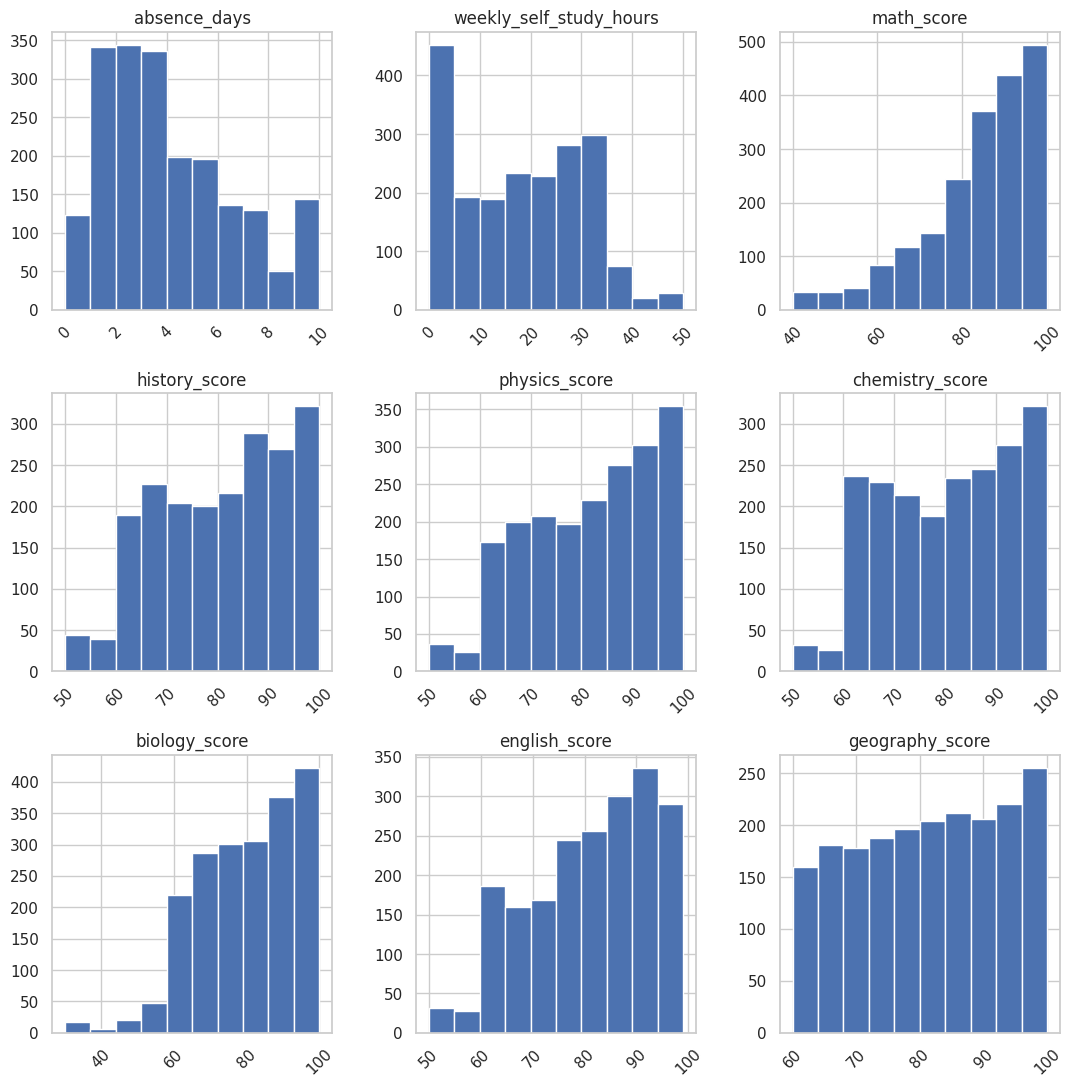

In [ ]:
df.hist(figsize=(13,13),xrot=45 ,bins=10)
plt.show()

#####TRANSFORMACION EN EL DATASET

 - **VARIABLES CAUNTITATIVAS EN CATEGORICAS**

La variable ***días de ausencia (absence_days)*** la transformo en variable categóricas ya que me interesa examinar patrones de asistencia basados en rangos de días de ausencia en lugar de calcular promedios precisos.
Lo mismo sucede con las ***horas semanales de auto estudio (weekly_self_study_hours)***.

In [ ]:
df['absence_days'] = df['absence_days'].astype('category')
df['weekly_self_study_hours']=df['weekly_self_study_hours'].astype('category')

- **CALCULO EL PROMEDIO**

Se agrega la variable promedio de las notas de las siete asignaturas

In [ ]:
df['promedio']=df['math_score']+df['history_score']+df['physics_score']+df['chemistry_score']+df['biology_score']+df['english_score']+df['geography_score']
df['promedio']=df['promedio']/7

###ANÁLISIS DESCRIPTIVO

#####VARIABLES CUANTITATIVAS

In [ ]:
df.describe().round(1) #Describe las columnas numéricas

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,promedio
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,83.5,80.3,81.3,80.0,79.6,81.3,80.9,81.0
std,13.2,12.7,12.5,12.8,13.7,12.0,11.6,6.0
min,40.0,50.0,50.0,50.0,30.0,50.0,60.0,59.1
25%,77.0,69.8,71.0,69.0,69.0,72.0,71.0,77.3
50%,87.0,82.0,83.0,81.0,81.0,83.0,81.0,81.0
75%,93.0,91.0,92.0,91.0,91.0,91.0,91.0,84.7
max,100.0,100.0,100.0,100.0,100.0,99.0,100.0,96.1


**Gráficas de las Notas por Asignatura**

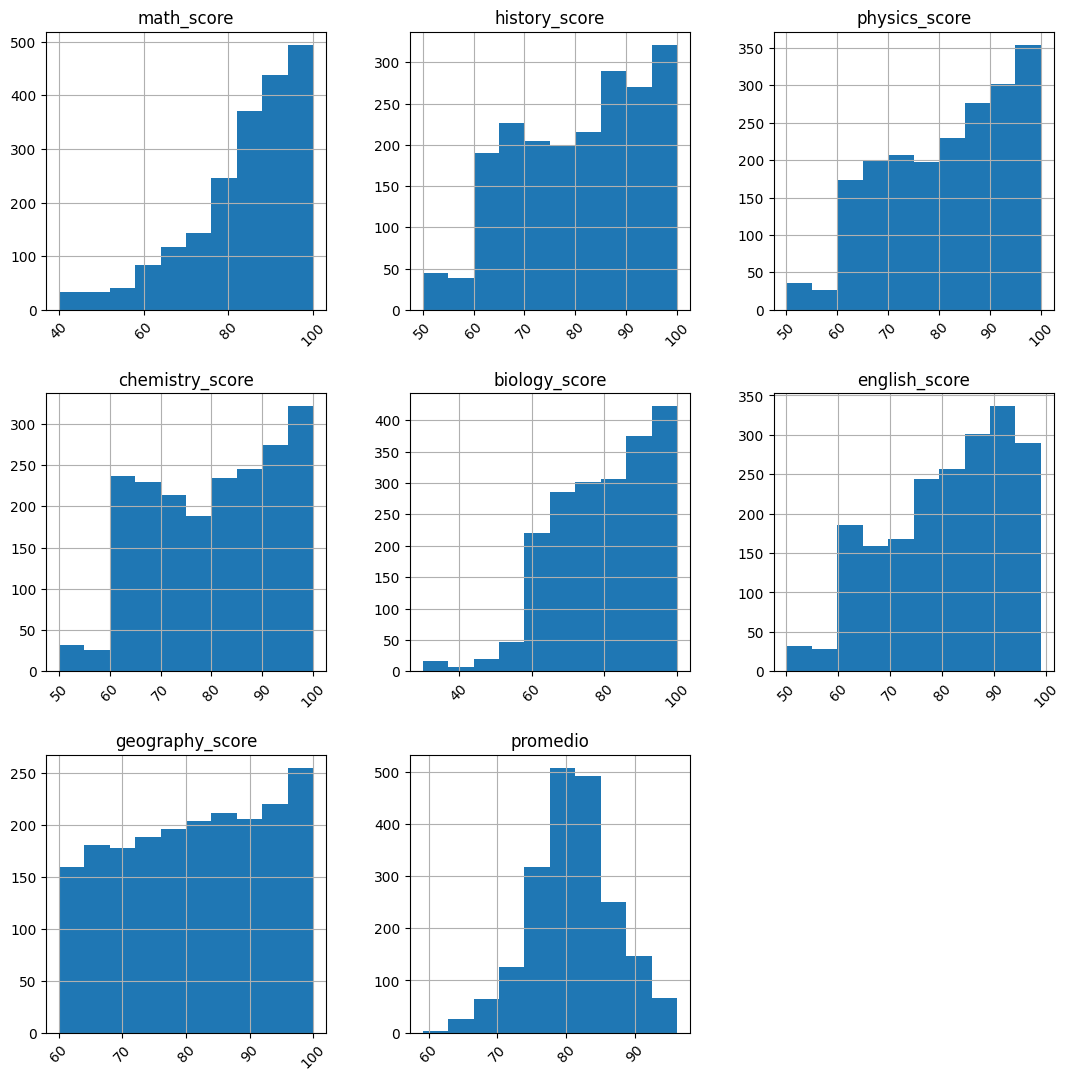

In [ ]:
df.hist(figsize=(13,13),xrot=45 ,bins=10)
plt.show()

Se observa que la **variable promedio** de todas las materias tiene una distribución normal con asimetría a la izquierda donde están los promedios más bajos.
La mayoría de los estudiantes obtienen promedios similares, lo que sugiere una consistencia en el rendimiento académico entre las siete materias.



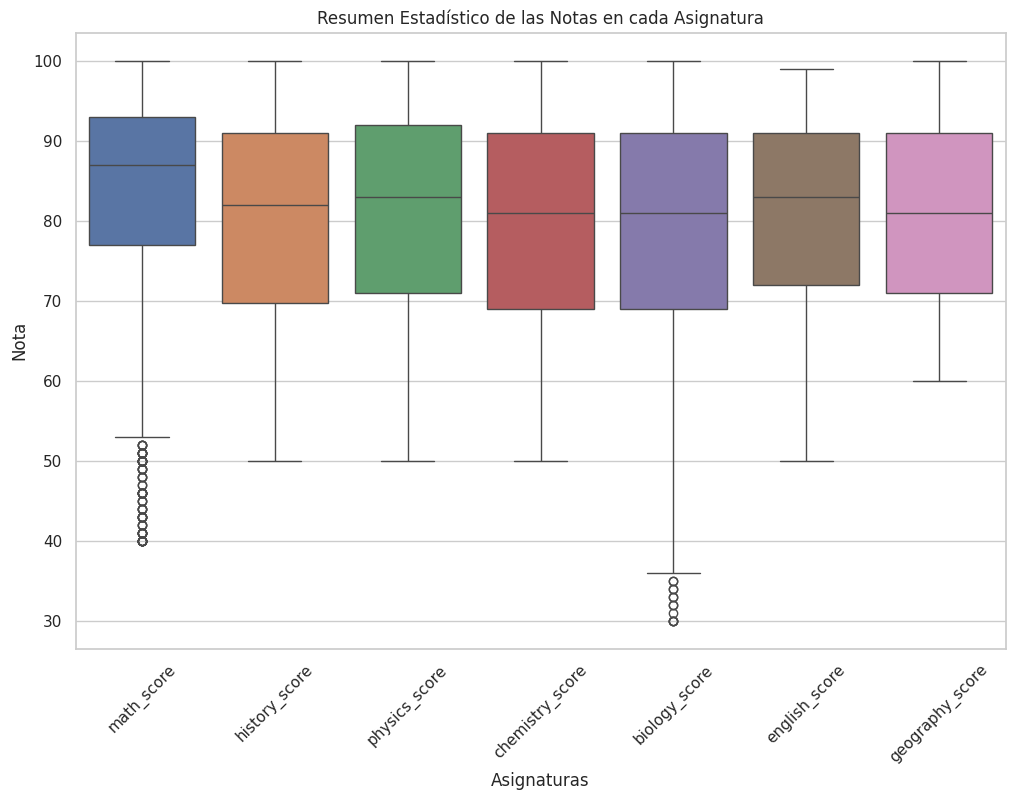

In [ ]:
# Creo el boxplot usando Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=[df['math_score'], df['history_score'], df['physics_score'], df['chemistry_score'], df['biology_score'], df['english_score'], df['geography_score']])
plt.title('Resumen Estadístico de las Notas en cada Asignatura')
plt.xlabel('Asignaturas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()


Se observan outliers en las notas de Matemática y Biología.

Los estudiantes muestran un buen rendimiento en general en todas las asignaturas, con notas promedios y medianas relativamente altas.

Sin embargo, hay algunas diferencias en la variabilidad de las notas entre asignaturas. Matemáticas se destaca como la asignatura con el mejor desempeño promedio, mientras que biología presenta tanto un promedio ligeramente más bajo como la mayor variabilidad en las notas.


In [ ]:
# Obtengo las estadísticas descriptivas
df_stats = df.describe().round(1)

# Transpongo para que las columnas sean las estadísticas
df_stats_transpuesta = df_stats.T
df_stats_transpuesta['coeficiente_de_variacion'] = (df_stats_transpuesta['std'] / df_stats_transpuesta['mean']) * 100
df_stats_transpuesta['IQR']=(df_stats_transpuesta['75%'] - df_stats_transpuesta['25%'])
# Mostrar el DataFrame de estadísticas
print(df_stats_transpuesta)


                  count  mean   std   min   25%   50%   75%    max  \
math_score       2000.0  83.5  13.2  40.0  77.0  87.0  93.0  100.0   
history_score    2000.0  80.3  12.7  50.0  69.8  82.0  91.0  100.0   
physics_score    2000.0  81.3  12.5  50.0  71.0  83.0  92.0  100.0   
chemistry_score  2000.0  80.0  12.8  50.0  69.0  81.0  91.0  100.0   
biology_score    2000.0  79.6  13.7  30.0  69.0  81.0  91.0  100.0   
english_score    2000.0  81.3  12.0  50.0  72.0  83.0  91.0   99.0   
geography_score  2000.0  80.9  11.6  60.0  71.0  81.0  91.0  100.0   
promedio         2000.0  81.0   6.0  59.1  77.3  81.0  84.7   96.1   

                 coeficiente_de_variacion   IQR  
math_score                      15.808383  16.0  
history_score                   15.815691  21.2  
physics_score                   15.375154  21.0  
chemistry_score                 16.000000  22.0  
biology_score                   17.211055  22.0  
english_score                   14.760148  19.0  
geography_score    

 Se observa que los coeficientes de variación de las variables de notas de las materias es menor o igual a 30%, significa que la media aritmética es representativa del conjunto de datos, por ende el conjunto de datos es *Homogéneo*

#####VARIABLES CUALITATIVAS

######**Carrera aspiracional**



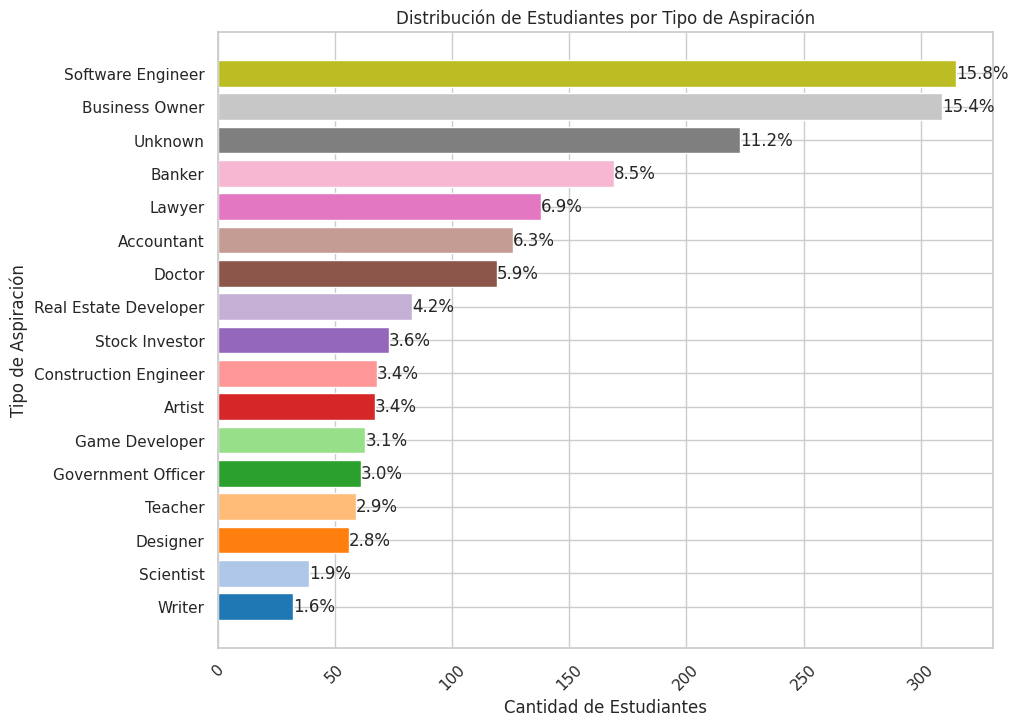

In [ ]:
# Cuento la cantidad de cada tipo de aspiración
aspiracion_cantidad = df['career_aspiration'].value_counts()

# Calculo los porcentajes
total_estudiantes = aspiracion_cantidad.sum()
porcentajes = aspiracion_cantidad / total_estudiantes * 100

# Cuento la cantidad de cada tipo de aspiración
aspiracion_cantidad = df['career_aspiration'].value_counts()

# Lista de colores
colors = plt.cm.tab20.colors  # Utilizando una paleta de colores de Matplotlib

# Ordeno los valores y los índices correspondientes de manera descendente
sorted_cantidad =aspiracion_cantidad.sort_values(ascending=True)
sorted_index = sorted_cantidad.index

# Calculo los porcentajes
total_estudiantes = aspiracion_cantidad.sum()
porcentajes = aspiracion_cantidad / total_estudiantes * 100

# Creo el gráfico de barras horizontal ordenado de manera descendente usando Matplotlib
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_index, sorted_cantidad.values, color=colors[:len(aspiracion_cantidad)])

# Agregar porcentajes a cada barra
for index, value in enumerate(sorted_index):
    plt.text(sorted_cantidad[value] , index, f'{porcentajes[value]:.1f}%', va='center')


plt.title('Distribución de Estudiantes por Tipo de Aspiración')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Tipo de Aspiración')
plt.xticks(rotation=45)
plt.show()


Se observa que la carreras aspiracionales más elegidas son Ingeniería de Software y Dueño de Negocio aunque existe bastante cantidad de estudiantes que no saben que carrera van a seguir.
Las menos elegidas son Escritor, Científico, etc.

######**Género**

In [ ]:
# Cuento la cantidad de cada género
genero_cantidad = df['gender'].value_counts()
genero_cantidad

gender
female    1002
male       998
Name: count, dtype: int64

* **Gráfico de Distribución de Estudiantes por Género**

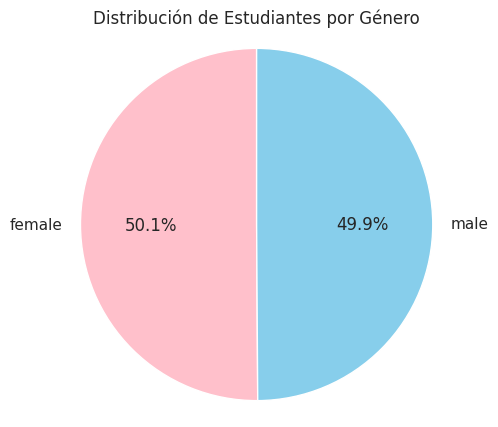

In [ ]:
# Gráfico de torta para el género usando Matplotlib
# Defino los colores personalizados
colors = ['pink', 'skyblue']
plt.figure(figsize=(5, 5))
plt.pie(genero_cantidad, labels=genero_cantidad.index, autopct='%1.1f%%', startangle=90, colors=colors) #colors=sns.color_palette('pastel6', len(genero_cantidad)))
plt.title('Distribución de Estudiantes por Género')
plt.axis('equal')  # Asegura que el gráfico de torta sea circular
plt.show()

Hay equilibrio en la cantidad de estudiantes femeninos y masculinos

* **Gráfico de Distribución de Días de Ausencia por Género**

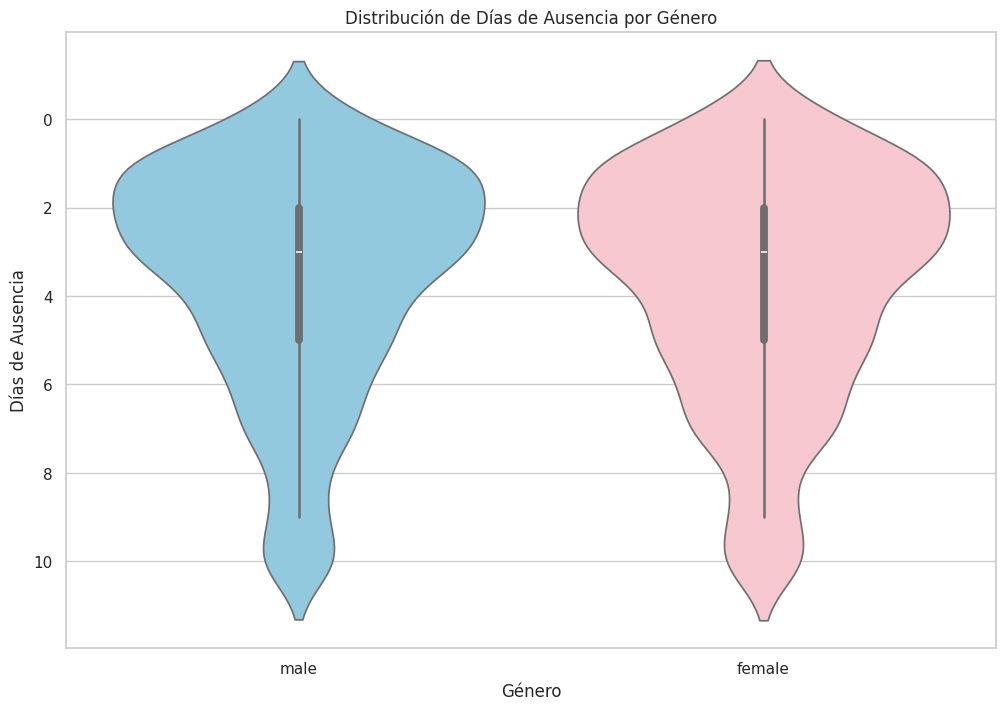

In [ ]:
#Cuento la cantidad de estudiantes agrupados por dias ausentes y género
ausentes_cantidad_genero = df.groupby(['absence_days', 'gender']).size().unstack().fillna(0)
ausentes_cantidad_genero

# Visualización del Género agrupado por dias de ausencia #
# Defino una paleta personalizada
colores = {"male": "skyblue", "female": "pink"}

plt.figure(figsize=(12, 8))
sns.violinplot(x='gender', y='absence_days', data=df, hue='gender',palette=colores , dodge=False, legend=False)
plt.title('Distribución de Días de Ausencia por Género')
plt.xlabel('Género')
plt.ylabel('Días de Ausencia')
plt.show()


Este gráfico nos muestra que hay similitud entre Géneros. No parece haber una diferencia significativa en la distribución de los días de ausencia entre hombres y mujeres. Ambas distribuciones son bastante similares en términos de mediana, rango intercuartil y densidad.

Con respecto al rango de ausencias la mayoría de los estudiantes tienen un bajo número de ausencias (entre 0 y 5 días).

* **Gráfico de Distribución de Horas de autoestudio semanal por Género**

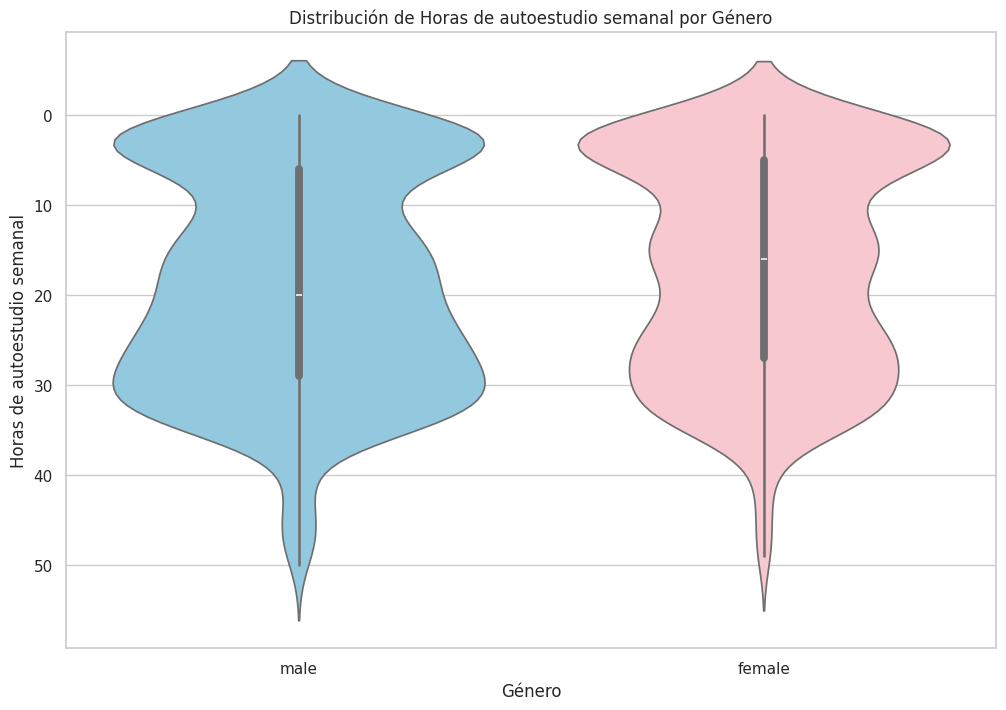

In [ ]:
# Visualización del Género agrupado por horas de autoestudio semanales
plt.figure(figsize=(12, 8))
sns.violinplot(x='gender', y='weekly_self_study_hours', data=df, hue='gender',palette=colores , dodge=False, legend=False)
plt.title('Distribución de Horas de autoestudio semanal por Género')
plt.xlabel('Género')
plt.ylabel('Horas de autoestudio semanal')
plt.show()

Este gráfico nos muestra que hay diferencia significativa en la distribución de las Horas de Autoestudio Semanal entre hombres y mujeres.
Parece que los varones dedican más horas de autoestudio semanal en comparación con las mujeres.

* **Distribución del Puntuación en Matemática por Género**

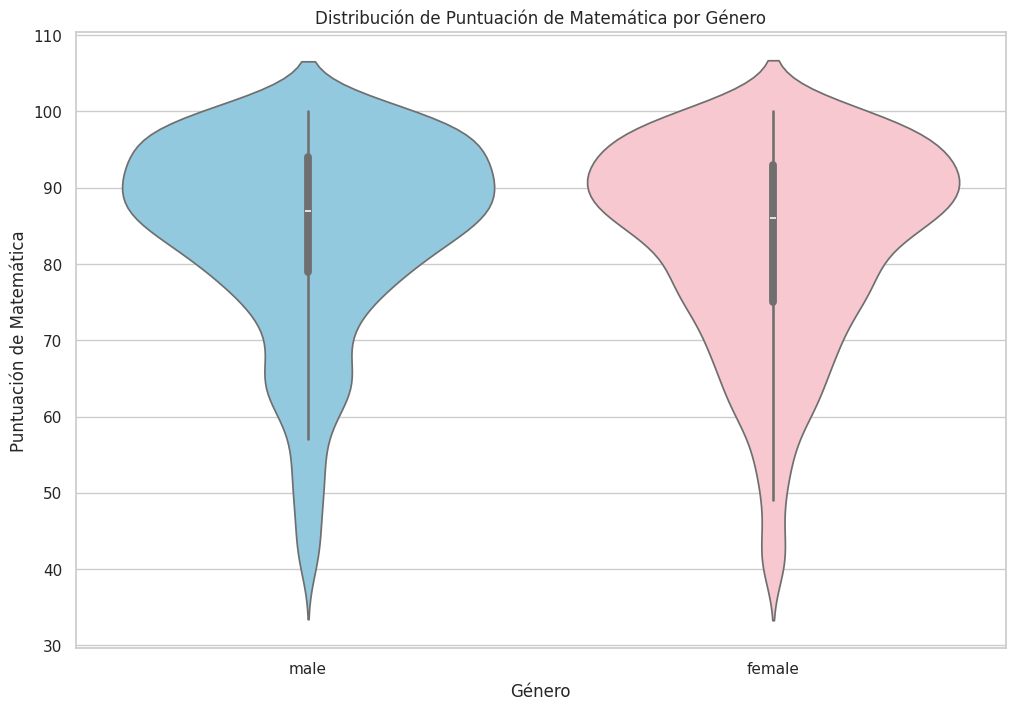

In [ ]:
# Visualización del Género agrupado por promedio #
plt.figure(figsize=(12, 8))
sns.violinplot(x='gender', y='math_score', data=df, hue='gender',palette=colores , dodge=False, legend=False)
plt.title('Distribución de Puntuación de Matemática por Género')
plt.xlabel('Género')
plt.ylabel('Puntuación de Matemática')
plt.show()

Las puntuaciones de matemáticas para ambos géneros muestran patrones similares en términos de distribución y variabilidad, con pequeñas diferencias en la forma de las distribuciones que podrían indicar variaciones menores en la dispersión de las puntuaciones.

* **Distribución de Aspiraciones Profesionales por Género**

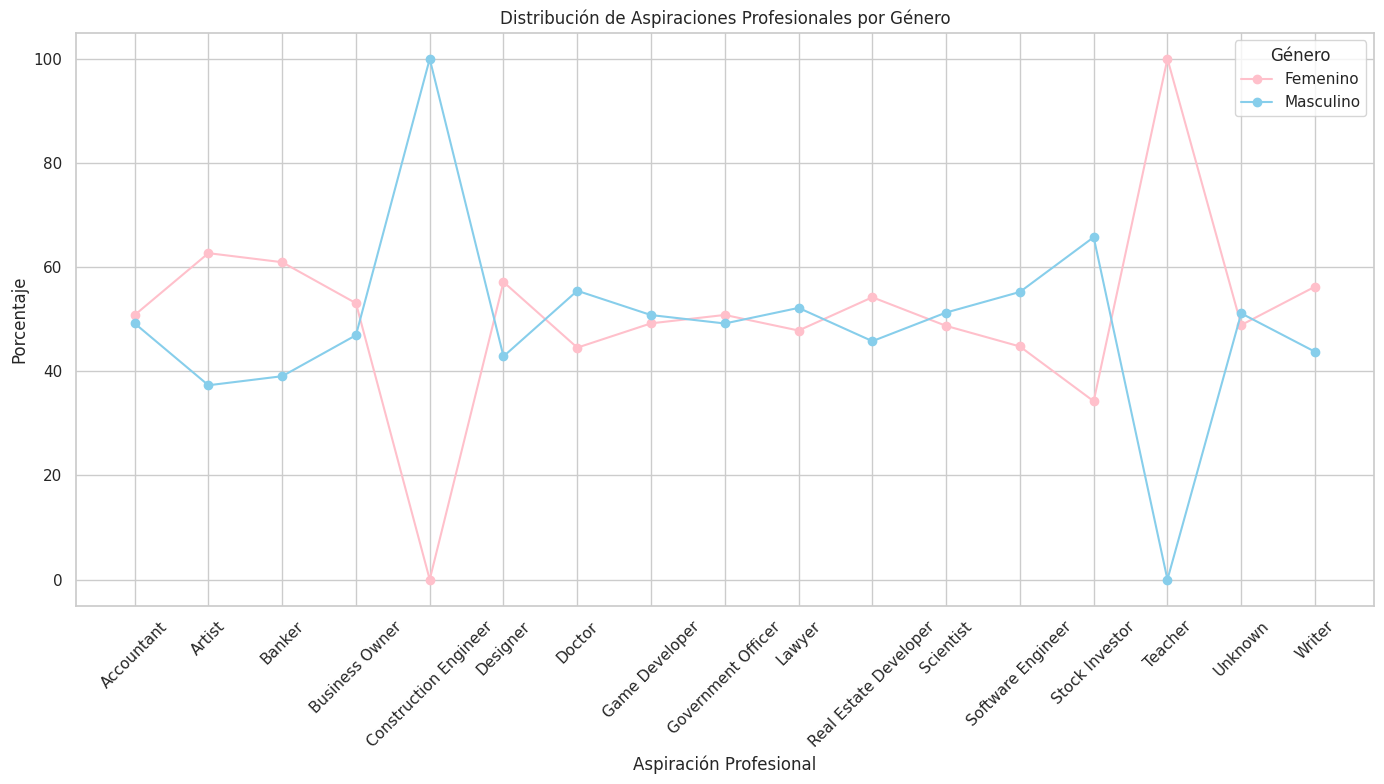

In [ ]:

#Cuento la cantidad de estudiantes agrupados por aspiración y género
aspiration_cantidad_genero = df.groupby(['career_aspiration', 'gender']).size().unstack().fillna(0)
#Calculo los porcentajes
aspiration_porcentajes = aspiration_cantidad_genero.div(aspiration_cantidad_genero.sum(axis=1), axis=0) * 100

# Creo el gráfico de líneas
plt.figure(figsize=(14, 8))  # Tamaño de la figura
plt.plot(aspiration_porcentajes.index, aspiration_porcentajes['female'], marker='o', linestyle='-', color='pink', label='Femenino')
plt.plot(aspiration_porcentajes.index, aspiration_porcentajes['male'], marker='o', linestyle='-', color='skyblue', label='Masculino')

# Añado título y etiquetas
plt.title('Distribución de Aspiraciones Profesionales por Género')
plt.xlabel('Aspiración Profesional')
plt.ylabel('Porcentaje')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.grid(True)

# Muestro el gráfico
plt.tight_layout()
plt.show()


Se observan porcentajes similares en las profesiones **ACCOUNTANT**, **GAME DEVELOPER**, **GOVERMENT OFFICER**, **SCIENTIST** y los que no saben que profesión van a seguir. Y se mantiene lo observado en el gráfico anterior para las profesiones **CONSTRUCTOR ENGINEER** que tiene solo hombres y la profesión **TEACHER** solo mujeres.

Hay más mujeres que hombres en la elección de las profesiones **ARTIST**, **BANKER**, **BUSINESS OWNER**, **DESIGNER**,  **REAL ESTATE DEVELOPER** y **WRITER**.

Hay más hombres que mujeres en la elección de las profeciones **DOCTOR**, **LAWYER**, **SOFTWARE ENGINEER** y **STOCK INVESTOR**


#####VARIABLES LOGICAS

######**Trabajo Part-Time y Actividades Extracurriculares**

In [ ]:
# Cuento los valores True y False
part_time_counts = df['part_time_job'].value_counts(normalize=True) * 100
extracurricular_counts = df['extracurricular_activities'].value_counts(normalize=True) * 100

# Creo un DataFrame para facilitar el uso de Seaborn
counts_df = pd.DataFrame({
    'Actividad': ['part_time_job', 'part_time_job', 'extracurricular_activities', 'extracurricular_activities'],
    'Estado': ['Si', 'No', 'Si', 'No'],
    'Porcentaje': [part_time_counts[True], part_time_counts[False], extracurricular_counts[True], extracurricular_counts[False]]
})

counts_df


,Actividad,Estado,Porcentaje
0,part_time_job,Si,15.8
1,part_time_job,No,84.2
2,extracurricular_activities,Si,20.4
3,extracurricular_activities,No,79.6


Se observa que el porcentaje de estudiantes sin trabajo part-time es mayor con respecto a los que tienen trabajo part-time.
Además, sucede lo mismo con las actividades extracurriculares, hay mayor proporción de los estudiantes que No realizan de los que Si.

TRANSFORMO VARIABLES LOGICAS

In [ ]:
df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)


**Gráfico**

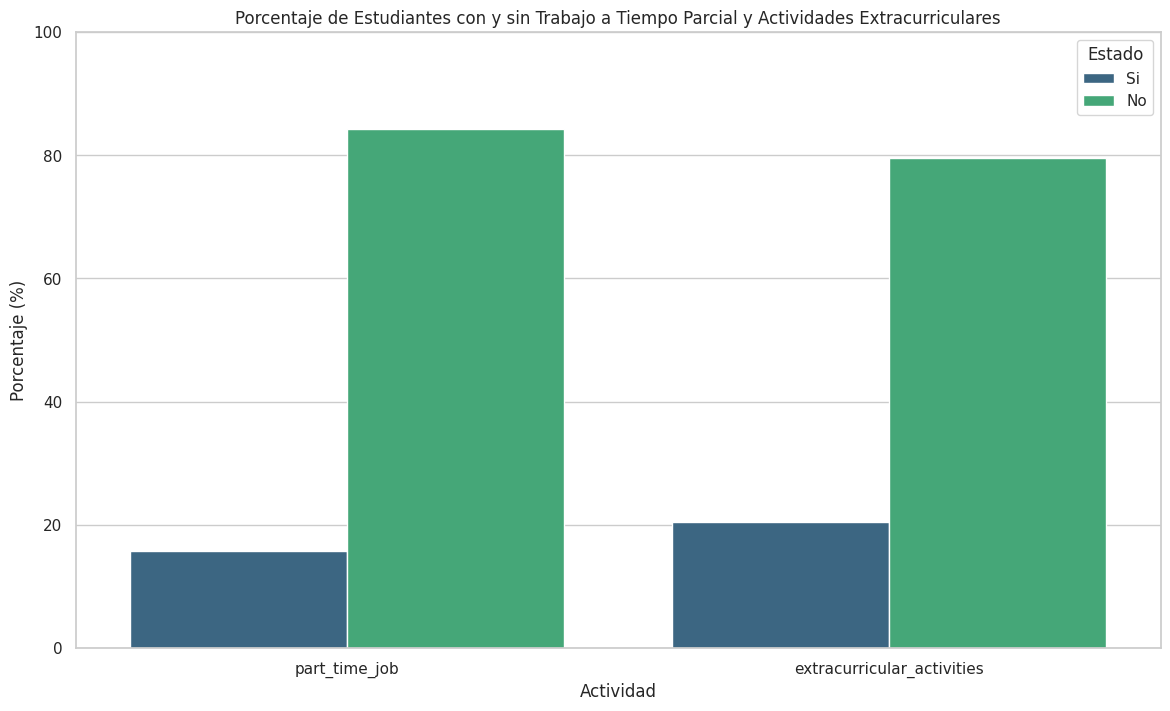

In [ ]:
## Gráfico de barras para los porcentajes los porcentajes
plt.figure(figsize=(14, 8))
sns.barplot(data=counts_df, x='Actividad', y='Porcentaje', hue='Estado', palette='viridis')
plt.title('Porcentaje de Estudiantes con y sin Trabajo a Tiempo Parcial y Actividades Extracurriculares')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Actividad')
plt.ylim(0, 100)
plt.legend(title='Estado')
plt.show()

#####**DEFINO ALTO RENDIMIENTO ACADEMICO**


- **Analizo el Promedio**

In [ ]:
#Uso describe y redondeo a 1 decimal
description = df.describe().round(1)

# Obtener solo la columna 'promedio'
promedio_column = description['promedio']
promedio_column

count    2000.0
mean       81.0
std         6.0
min        59.1
25%        77.3
50%        81.0
75%        84.7
max        96.1
Name: promedio, dtype: float64

- **UMBRAL PARA DEFINIR ALTO RENDIMIENTO**

Dado que la variable promedio tiene una distribución normal y tenemos los estadísticos (media = 81.0, desviación estándar=6.0) podemos usar Media + Desviación Estándar para definir el umbral de alto rendimiento.

Si nuestra variable no fuera continua tendría que usar otra estratégia para definir el umbral, por ejemplo el percentil 75.

In [ ]:
media = 81.0
desviacion_estandar = 6.0
umbral_alto_rendimiento = media + desviacion_estandar  # 81.0 + 6.0 = 87.0

print(f"Umbral para alto rendimiento: {umbral_alto_rendimiento}")
# Umbral para alto rendimiento: 87.0


Umbral para alto rendimiento: 87.0


In [ ]:
percentil_75 = 84.7
print(f"Umbral para alto rendimiento basado en el percentil 75: {percentil_75}")
# Umbral para alto rendimiento basado en el percentil 75: 84.7


Umbral para alto rendimiento basado en el percentil 75: 84.7


**Alto rendimiento con umbral de 87.0**

Defino la variable rendimiento para poder clasificar a los alumnos en los que tienen alto rendimiento asignando 1 y los que tienen bajo rendimiento 0.

In [ ]:
df['rendimiento'] = np.where(df['promedio'] >= 87.0, 1, 0)

rendimiento
0    1683
1     317
Name: count, dtype: int64


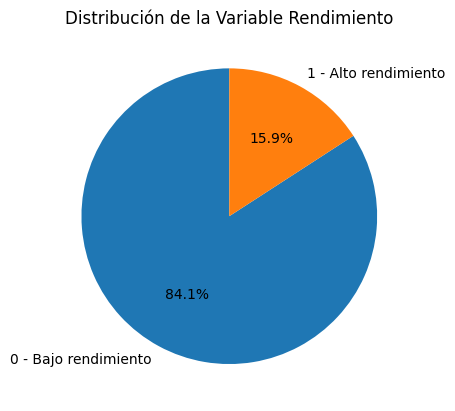

In [ ]:
# Cuento las frecuencias de cada valor en la variable binaria
frecuencias = df['rendimiento'].value_counts()
print(frecuencias)

# Reemplazar 0 por 'bajo rendimiento' y 1 por 'alto rendimiento'
frecuencias.index = frecuencias.index.map({0: '0 - Bajo rendimiento', 1: '1 - Alto rendimiento'})


# Crear un gráfico de pastel
frecuencias.plot(kind='pie', autopct='%1.1f%%', startangle=90,labels=frecuencias.index)
plt.ylabel('')
plt.title('Distribución de la Variable Rendimiento')
plt.show()



Acá podemos observar que hay un desbalanceo usando el umbral 87.0, supongo que el modelo predictivo que use va a ser más preciso para predecir bajo rendimiento dado que el 84.1% de los datos estan calificados como bajo rendimiento y el 15.9% de los datos están clasificados como alto rendimiento.

**Horas semanales de Auto-estudio**

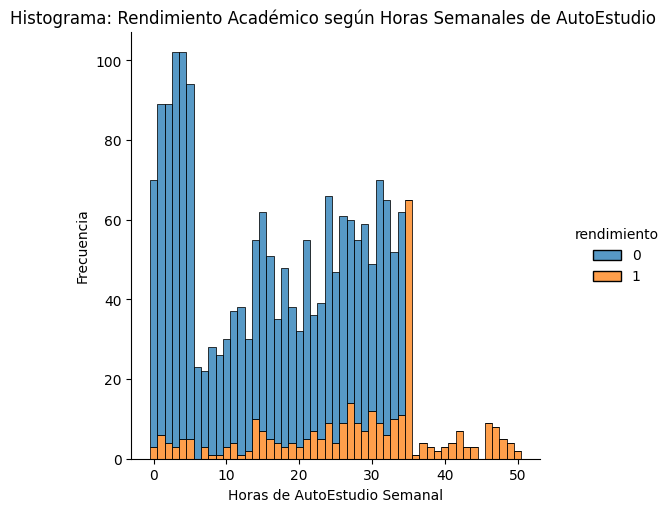

In [ ]:
sns.displot(data=df, x="weekly_self_study_hours", hue="rendimiento", multiple="stack")
plt.title('Histograma: Rendimiento Académico según Horas Semanales de AutoEstudio ')
plt.xlabel('Horas de AutoEstudio Semanal')
plt.ylabel('Frecuencia')
plt.show()

**Notas de Matemática**

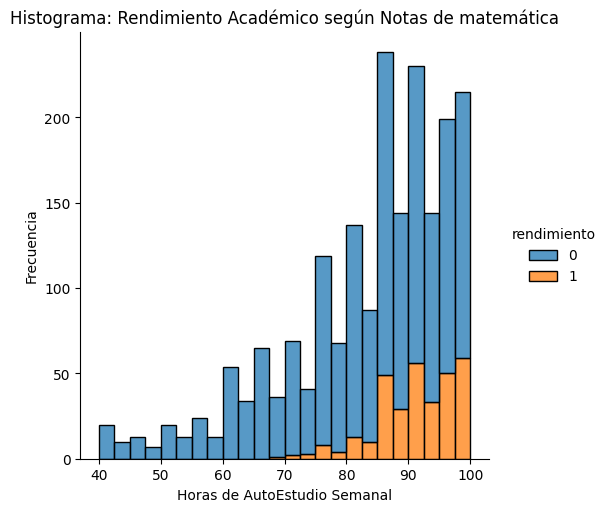

In [ ]:
sns.displot(data=df, x="math_score", hue="rendimiento", multiple="stack")
plt.title('Histograma: Rendimiento Académico según Notas de matemática')
plt.xlabel('Horas de AutoEstudio Semanal')
plt.ylabel('Frecuencia')
plt.show()

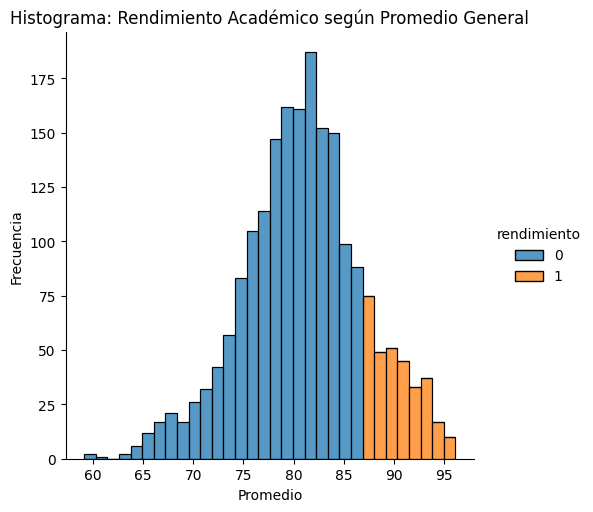

In [ ]:
sns.displot(data=df, x="promedio", hue="rendimiento", multiple="stack")
plt.title('Histograma: Rendimiento Académico según Promedio General')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

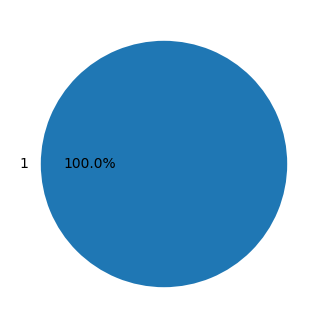

In [ ]:
df2 = df[df['promedio']>= 87.0].groupby(['rendimiento']).count()
x = df2.index
y = df2['promedio']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.show()

**Carrera Aspiracional**

Los que aspiran a ser Doctores son los que mejor rendimiento académico tienen

In [ ]:
doc = df.groupby('career_aspiration').count()
doc2 = df[df['rendimiento']==1].groupby('career_aspiration').count()
dfoc = {'Cant.Total': pd.Series(doc['rendimiento']),'Alto': pd.Series(doc2['rendimiento'])}
df_oc = pd.DataFrame(dfoc)
df_oc['%Rendimiento'] = df_oc['Alto']/df_oc['Cant.Total']*100
df_oc.sort_values('%Rendimiento', ascending=False).round(1)

,Cant.Total,Alto,%Rendimiento
career_aspiration,,,
Doctor,119,89,74.8
Scientist,39,16,41.0
Construction Engineer,68,17,25.0
Lawyer,138,32,23.2
Writer,32,7,21.9
Designer,56,11,19.6
Software Engineer,315,51,16.2
Government Officer,61,8,13.1
Banker,169,19,11.2


#####**CORRELACION ENTRE VARIABLES**

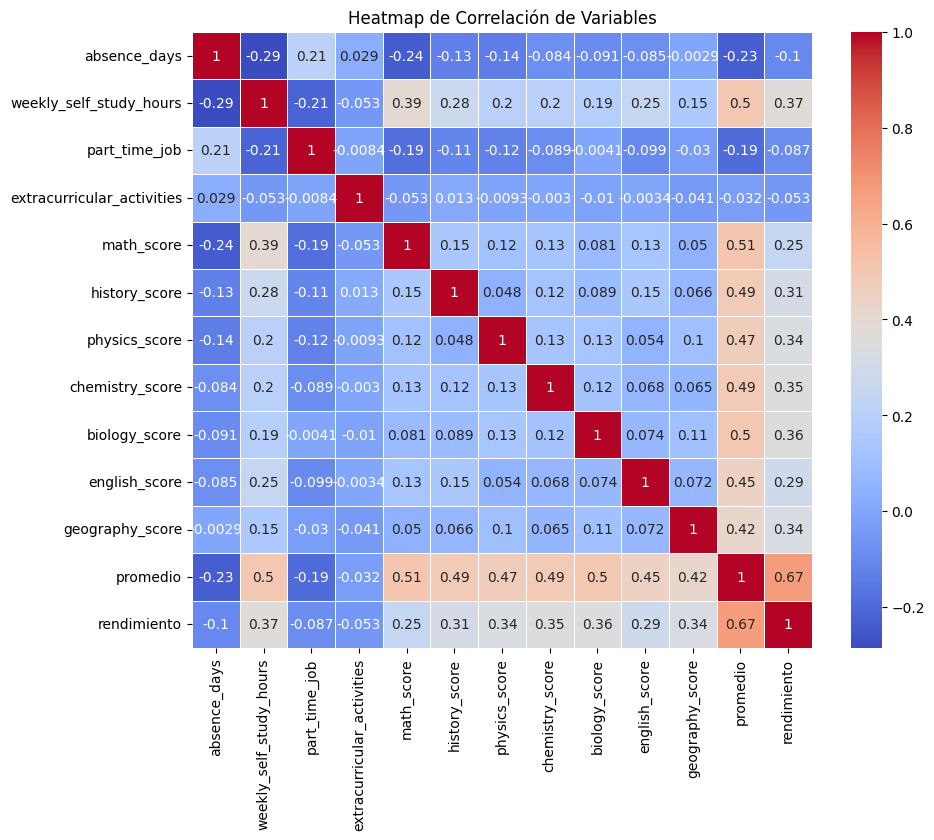

In [ ]:
# Seleccionar las columnas relevantes para la correlación
columnas_de_interes = ['absence_days', 'weekly_self_study_hours','part_time_job','extracurricular_activities','math_score', 'history_score', 'physics_score',
 'chemistry_score', 'biology_score', 'english_score', 'geography_score','promedio','rendimiento']
 # Añade más columnas si es necesario

# Calcular la matriz de correlación
correlation_matrix = df[columnas_de_interes].corr()

# Crear el heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir etiquetas y título
plt.title('Heatmap de Correlación de Variables')

# Mostrar el gráfico
plt.show()

**Correlación Positiva:**

Todas las **notas de las asignaturas** (math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score) tienen una *correlación positiva* con el **promedio general**, lo cual es esperado ya que el promedio es una medida agregada de todas estas notas.

También hay *correlación positiva*  entre las **horas de estudio semanales** y las **notas en matemáticas** (math_score) y el promedio general. Esto sugiere que estudiar más horas por semana está asociado con un mejor rendimiento académico, especialmente en matemáticas.


**Correlación Negativa:**

Existe una *correlación negativa* entre los **días de ausencia y las notas en todas las asignaturas y el promedio general**. Esto indica que a mayor número de ausencias, menor es el rendimiento académico, lo cual es lógico ya que faltar a clases puede afectar el aprendizaje.

La correlación entre tener un **trabajo a tiempo parcial y las notas académicas** es generalmente negativa pero débil. Esto sugiere que trabajar mientras se estudia puede tener un impacto ligeramente negativo en el rendimiento académico, aunque no es una relación muy fuerte.

Las actividades extracurriculares tienen correlaciones muy bajas con las notas académicas y el promedio general, lo que sugiere que participar en actividades extracurriculares no tiene un impacto significativo en el rendimiento académico.

**Correlaciones entre Asignaturas:**

Las notas en diferentes asignaturas están positivamente correlacionadas entre sí. Esto implica que los estudiantes que son buenos en una asignatura tienden a ser buenos en otras también, lo que puede reflejar una capacidad académica general o factores como la motivación y las habilidades de estudio.

######**Relación entre Horas semanales de auto Estudio y el Promedio**

In [ ]:
# Creo un diccionario para mapear los códigos de rango de horas de Estudio
# a etiquetas descriptivas según las características de la muestra
rangos_horasestudio_map = {1:'0-10', 2: '11-20', 3: '21-30', 4:'30+'}

# Función para asignar el rango según las horas de estudio
def asignar_rango(horas):
    if horas <= 10:
        return 1
    elif horas <= 20:
        return 2
    elif horas <= 30:
        return 3
    else:
        return 4

# Creo una nueva columna con el código de rango de horas de estudio
df['horas_estudio_codigo'] = df['weekly_self_study_hours'].apply(asignar_rango)

# Mapear los códigos de rango de horas de estudio a etiquetas descriptivas en una nueva columna
df['horas_estudio_new'] = df['horas_estudio_codigo'].map(rangos_horasestudio_map)


rango_promedios_map = {1:'0-40', 2: '41-60', 3: '61-80', 4:'81-100'}

def asignar_rango_promedio(promedio):
    if promedio <= 40:
        return 1
    elif promedio <= 60:
        return 2
    elif promedio <= 80:
        return 3
    else:
        return 4


df['promedio_codigo'] = df['promedio'].apply(asignar_rango_promedio)

df['promedio_new'] = df['promedio_codigo'].map(rango_promedios_map)



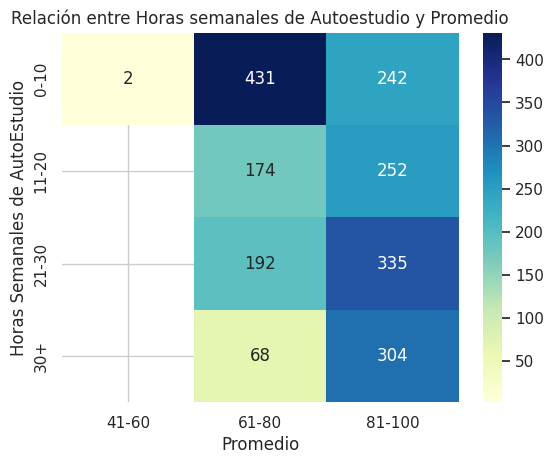

In [ ]:
import seaborn as sns
# datos para el heatmap
df_matrix = df.groupby(['horas_estudio_new','promedio_new']).size().unstack()

# Creo el heatmap
sns.heatmap(data=df_matrix, cmap='YlGnBu', annot=True, fmt='g')

# Personalizo el heatmap
plt.xlabel('Promedio')
plt.ylabel('Horas Semanales de AutoEstudio')
plt.title('Relación entre Horas semanales de Autoestudio y Promedio')

# Muestro el heatmap
plt.show()

Observamos que las horas semanales de autoestudio juega un papel importante en el logro de un promedio de calificaciones más alto, pero no es el único factor determinante. Es probable que haya otras variables que influyan en el rendimiento académico, como la capacidad individual, las estrategias de aprendizaje y la motivación.

######**Relación entre Horas semanales de auto Estudio y las Notas de Matemática**

In [ ]:
# Creo un diccionario para mapear los códigos de rango de notas de Matemática
# a etiquetas descriptivas según las características de la muestra
rangos_mathscore_map = {1:'0-40', 2: '41-60', 3: '61-80', 4:'81-100'}

# Función para asignar el rango según las notas de Matemática
def asignar_rango_notas(nota):
    if nota <= 40:
        return 1
    elif nota <= 60:
        return 2
    elif nota <= 80:
        return 3
    else:
        return 4

# Creo una nueva columna con el código de rango de notas de matemática
df['math_score_cod'] = df['math_score'].apply(asignar_rango_notas)

# Mapear los códigos de rango de  de notas de matemática a etiquetas descriptivas en una nueva columna
df['math_score_new'] = df['math_score_cod'].map(rangos_mathscore_map)


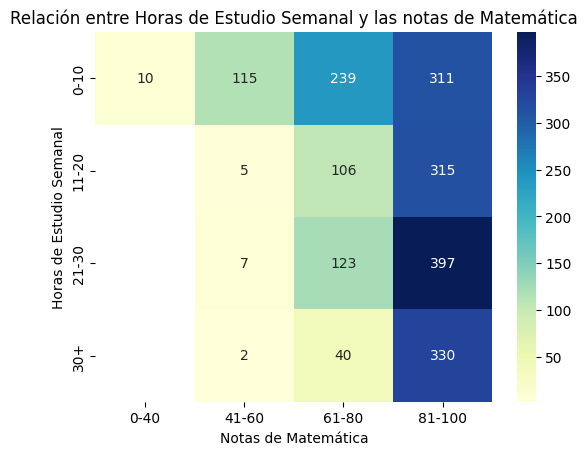

In [ ]:
import seaborn as sns
# datos para el heatmap
df_matrix = df.groupby(['horas_estudio_new','math_score_new']).size().unstack()

# Creo el heatmap
sns.heatmap(data=df_matrix, cmap='YlGnBu', annot=True, fmt='g')

# Personalizo el heatmap
plt.xlabel('Notas de Matemática')
plt.ylabel('Horas de Estudio Semanal')
plt.title('Relación entre Horas de Estudio Semanal y las notas de Matemática')

# Muestro el heatmap
plt.show()

El heatmap sugiere que el autoestudio semanal es un factor importante para obtener buenas notas en matemáticas, pero no el único. Otros factores  como la aptitud natural, el apoyo de los profesores y la motivación también influyen en el rendimiento académico.

######**Analizo con K-means si hay segmentación de Datos**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecciono las columnas numéricas relevantes
data_numeric = df[['math_score', 'history_score', 'physics_score', 'chemistry_score',
                   'biology_score', 'english_score', 'geography_score','promedio','weekly_self_study_hours','absence_days','rendimiento']]

# Normalizo los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)

# Aplico K-means con 3 clusters como ejemplo
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(data_normalized)

# Ver los resultados
print(df[['first_name', 'last_name',  'promedio', 'weekly_self_study_hours', 'cluster']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     first_name last_name   promedio weekly_self_study_hours  cluster
id                                                                   
1          Paul     Casey  82.000000                      27        0
2      Danielle  Sandoval  91.428571                      47        1
3          Tina   Andrews  86.428571                      13        0
4          Tara     Clark  78.714286                       3        2
5       Anthony    Campos  74.428571                      10        2
...         ...       ...        ...                     ...      ...
1996       Alan  Reynolds  79.714286                      30        0
1997     Thomas   Gilbert  76.285714                      20        0
1998    Madison     Cross  82.571429                      14        0
1999   Brittany   Compton  80.857143                       5        2
2000    Natalie     Smith  88.142857                      27        1

[2000 rows x 5 columns]


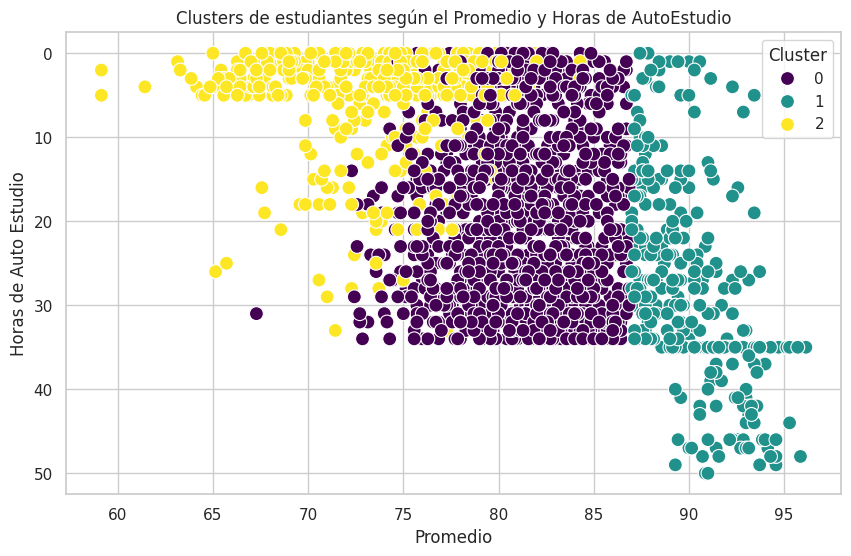

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Para estilizar los gráficos con seaborn

# Grafico scatter plots de dos dimensiones a la vez
sns.set(style="whitegrid")

# x='promedio', y='weekly_self_study_hours'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='promedio', y='weekly_self_study_hours', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters de estudiantes según el Promedio y Horas de AutoEstudio')
plt.xlabel('Promedio')
plt.ylabel('Horas de Auto Estudio')
plt.legend(title='Cluster')
plt.show()


Se puede observar que los estudiantes con mejores promedios tienden a dedicar más tiempo al autoestudio. Sin embargo, también hay casos de estudiantes con promedios más bajos que dedican mucho tiempo al estudio. Esto sugiere que, aunque existe una tendencia general en la que más horas de autoestudio se correlacionan con mejores promedios, hay superposiciones entre los clústeres. Es decir, hay estudiantes en ambos extremos del espectro que no siguen esta tendencia.


##MACHINE LEARNING

####**1. Codificación de Variables**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Codifico variables categóricas
le = LabelEncoder()
df_codificado=df

df_codificado['gender'] = le.fit_transform(df['gender'])
df_codificado['career_aspiration'] = le.fit_transform(df['career_aspiration'])
df_codificado['part_time_job'] = le.fit_transform(df['part_time_job'])
df_codificado['extracurricular_activities'] = le.fit_transform(df['extracurricular_activities'])
df_codificado['horas_estudio_new'] = le.fit_transform(df['horas_estudio_new'])
df_codificado['promedio_new'] = le.fit_transform(df['promedio_new'])
df_codificado['math_score_new'] = le.fit_transform(df['math_score_new'])


# Variables independientes y dependientes
X = df_codificado.drop(columns=['cluster','rendimiento','first_name','last_name','email','horas_estudio_new','horas_estudio_codigo','math_score_new','math_score_cod','promedio','promedio_new','promedio_codigo'])
y = df_codificado['rendimiento']

In [ ]:
 #Chequeo las columanas de X
X.columns

Index(['gender', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score'],
      dtype='object')

####**2. Divido el conjunto de Datos en Entrenamiento y Prueba**

Inicialmente usaré 80% de los datos para entrenamiento y un 20% para los datos de testeo.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####**3. Modelos**


#####**Regresión logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report



# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg.predict(X_test)

#Probabilidades para la clase 1 alto rendimiento
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]




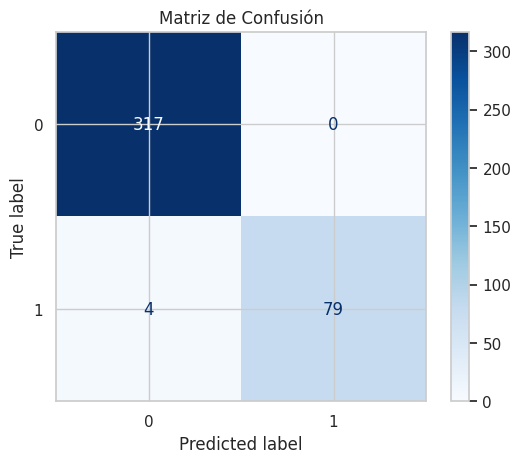

In [ ]:
# Calculo la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred)

# Visualizo la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


En la matriz de confusión se puede observar que el modelo tiene una alta precisión en la predicción de la clase ***bajo rendimiento***, con 317 predicciones correctas y ninguna predicción incorrecta. Sin embargo, el modelo tiene un rendimiento menos preciso en la predicción de la clase ***alto_rendimiento***, con 79 predicciones correctas y 4 predicciones incorrectas.


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       317
           1       1.00      0.95      0.98        83

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



Estos resultados fueron obtenidos sin aplicar ninguna técnica para equilibrar las clases, igualmente el modelo logró una alta precisión y recall. Sin embargo, este desempeño puede estar influenciado por el desbalanceo de clases, y el modelo podría estar sesgado hacia la clase mayoritaria (bajo rendimiento)

**- Clase 0 (bajo rendimiento):**

Alta precisión (0.99) y recall (1.00), indicando que el modelo predice muy bien esta clase, probablemente debido a la gran cantidad de ejemplos de esta clase en el conjunto de datos.

**- Clase 1 (alto rendimiento):**

Alta precisión (1.00) pero menor recall (0.95), lo que significa que el modelo identifica correctamente todos los ejemplos de alto rendimiento que predice, pero aún no detecta todos los casos de alto rendimiento.



######**Aplicación de SMOTE**

A modo de prueba utilicé SMOTE (Synthetic Minority Over-sampling Technique) para generar muestras sintéticas de la clase minoritaria (alto_rendimiento) y equilibrar así el conjunto de datos.

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Variables independientes y dependientes
X = df_codificado[['gender', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score']]
y = df_codificado['rendimiento']

# Manejar los valores NaN usando SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)



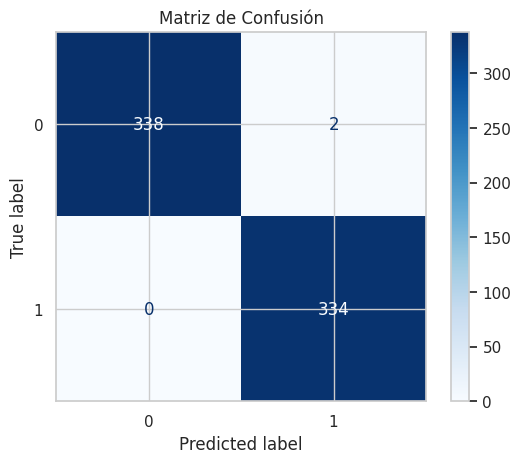

In [ ]:
# Calculo la matriz de confusión
cm2 = confusion_matrix(y_test, y_pred)

# Visualizo la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

El modelo tiene un rendimiento menos preciso en la predicción de la clase bajo rendimiento, con 339 predicciones correctas y 1 prediccione incorrecta.

In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       340
           1       0.99      1.00      1.00       334

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674



Los resultados del modelo de **Regresión Logística** después de utilizar ***SMOTE*** son excelentes, con una precisión del 100% en todas las métricas evaluadas. Esto sugiere que el modelo es altamente efectivo en la clasificación de las instancias y en la predicción de ambas clases.

#####**Arboles de Decisión**

 - **1. Sin Limitar profundidad y usando 20% de datos de Test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

## X = df_codificado[['weekly_self_study_hours', 'math_score']]  # Variables predictoras
## X = df_codificado[['weekly_self_study_hours', 'absence_days','math_score','biology_score','promedio']]

# Variables independientes y dependientes
X = df_codificado[['gender', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score']]

y = df_codificado['rendimiento']

#Separo el conjunto de datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Predecir las probabilidades para la clase positiva (1)
y_probs = clf.predict_proba(X_test)[:, 1]




In [ ]:
df['rendimiento'].unique()

array([0, 1])

In [ ]:
class_names = df['rendimiento'].unique().astype(str)

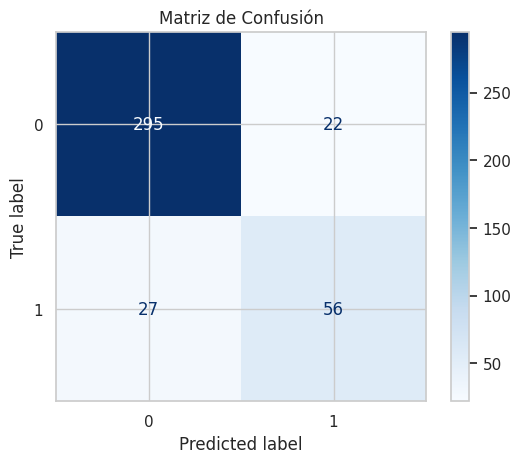

In [ ]:
# Calculo la matriz de confusión
cm3 = confusion_matrix(y_test, y_pred)

# Visualizo la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

Se observa que predijo correctamente.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       317
           1       0.72      0.67      0.70        83

    accuracy                           0.88       400
   macro avg       0.82      0.80      0.81       400
weighted avg       0.88      0.88      0.88       400



El modelo ha clasificado perfectamente todas las instancias del conjunto de prueba.
Los valores perfectos (1.00) para precisión, recall y F1-score en ambas clases sugieren que no hay errores en las predicciones.

A pesar del desbalanceo en los datos parece ser más excato al predecir el rendimiento del alumno.


**Validación cruzada**

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.92   0.9125 0.92   0.8975 0.9275]
Mean Cross-Validation Score: 0.9155


Los resultados de la validación cruzada muestran una puntuación perfecta (1.0) en todas las iteraciones, lo que puede indicar que el modelo se ajusta muy bien a los datos.

Esto refuerza la confianza en la capacidad del modelo para generalizar a nuevos datos y mantener un rendimiento estable en diferentes condiciones.

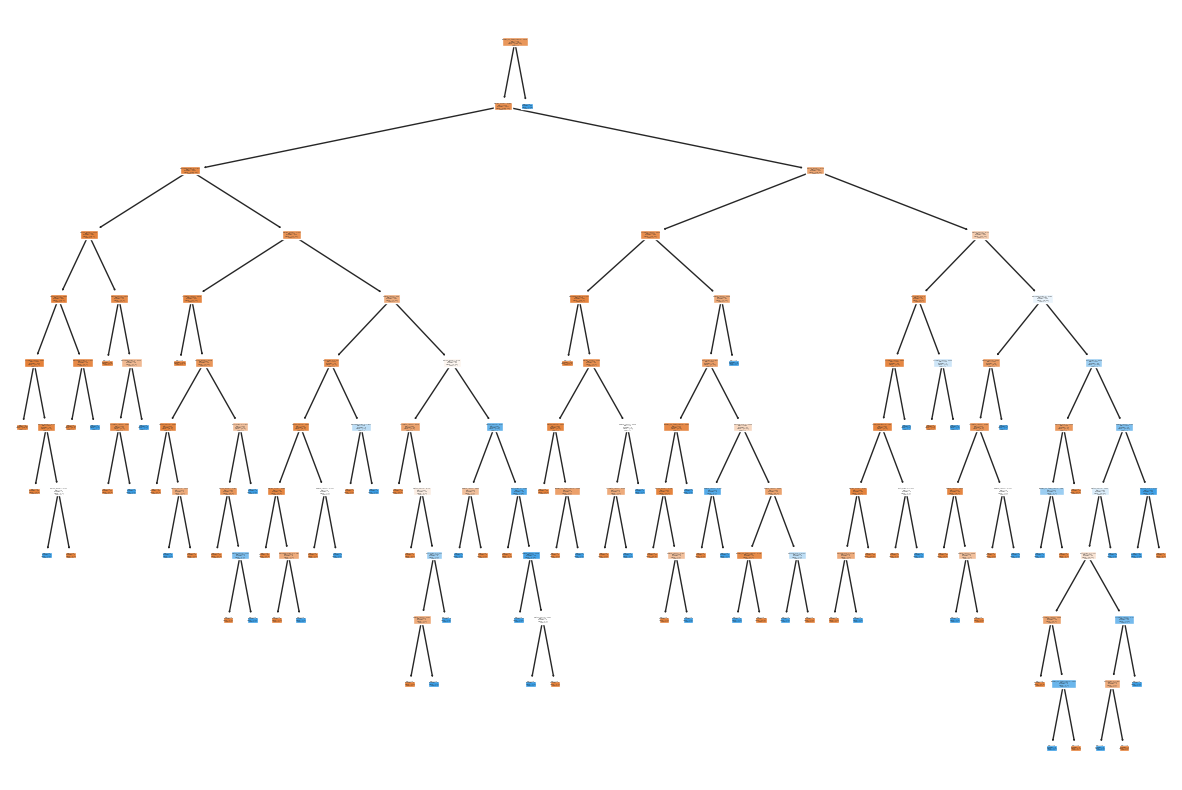

In [ ]:
# Configuro el tamaño de la figura
plt.figure(figsize=(15, 10))

# Visualizar el árbol de decisión
plot_tree(clf, filled=True, feature_names = X.columns, class_names =class_names)

# Mostrar el gráfico
plt.show()


######Frontera de Desición

Text(0.5, 1.0, 'Fronteras de Desición del Arbol de Decisión')

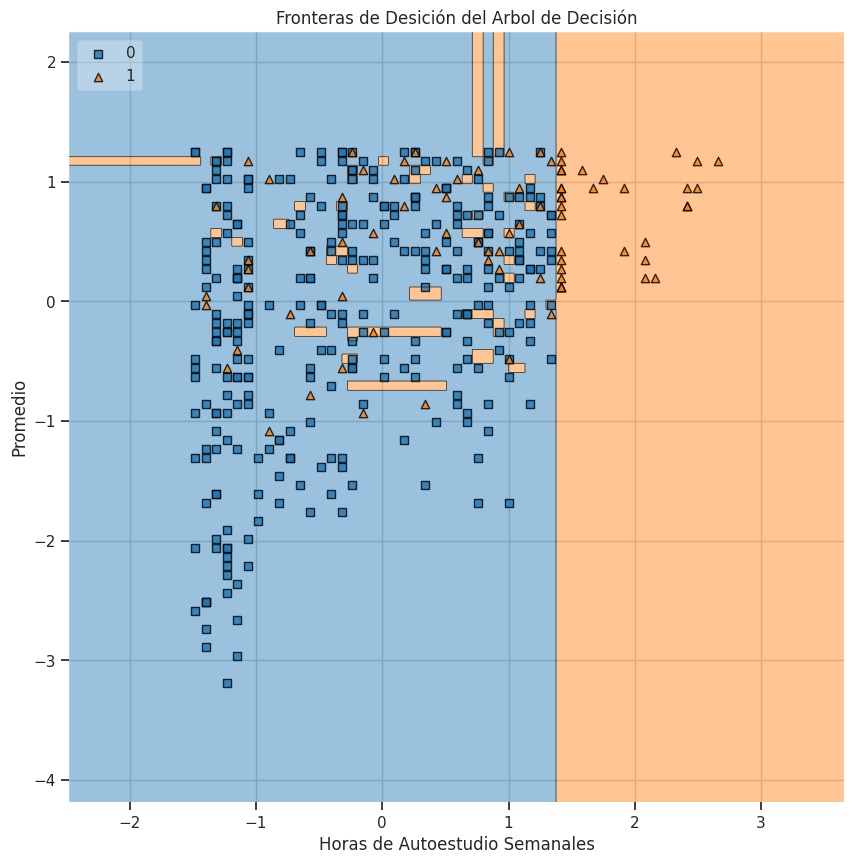

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions

# Variables independientes y dependientes
# X = df_codificado[['weekly_self_study_hours', 'math_score']]  # Variables predictoras
# X = df_codificado[['math_score', 'promedio']]
# X = df_codificado[['weekly_self_study_hours', 'promedio']]

X = df_codificado[['weekly_self_study_hours', 'math_score']]  # Variables predictoras
y = df_codificado['rendimiento']

#Separo el conjunto de datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Predecir las probabilidades para la clase positiva (1)
y_probs = clf.predict_proba(X_test)[:, 1]

# Decision Tree
# Configuro el tamaño de la figura
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test.values, clf=clf, legend=2)
plt.xlabel('Horas de Autoestudio Semanales')
plt.ylabel('Promedio')
plt.title('Fronteras de Desición del Arbol de Decisión')

El gráfico muestra la frontera de decisión del modelo para predecir el rendimiento de los alumnos con un resultado binario (0 o 1) donde 0 es bajo rendimiento y 1 alto rendimiento basado en dos variables: "Horas de Autoestudio Semanales" y "Promedio".

La línea separa las regiones donde el modelo predice 0 (azul) o 1 (naranja).

Podemos ver que el modelo separa bien los datos, con la mayoría de los puntos clasificados correctamente en su respectiva región. Sin embargo, hay algunos puntos mal clasificados, como los puntos azules que están cerca de la línea naranja en la región naranja y viseversa.

#####**Random Forest**

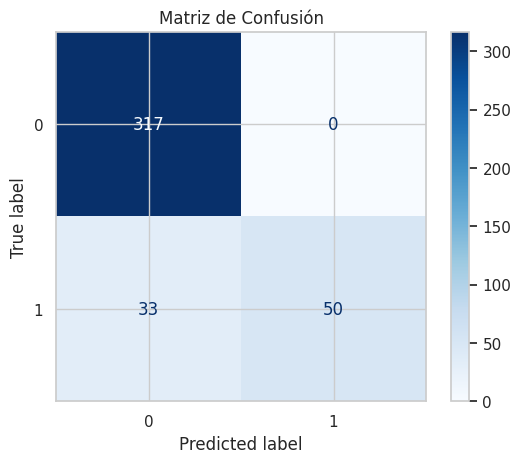

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,  classification_report,precision_score, recall_score, f1_score , mean_squared_error, r2_score

#X = df_codificado[[ 'weekly_self_study_hours','math_score', 'history_score', 'physics_score','chemistry_score', 'biology_score', 'english_score', 'geography_score','promedio']]
X = df_codificado[['gender', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score']]

y = df_codificado['rendimiento']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Entrena el modelo de clasificación
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(X_train, y_train)

# Realiza predicciones
y_pred = forest_clf.predict(X_test)

# Calcula la matriz de confusión
cm4 = confusion_matrix(y_test, y_pred)

# Predecir en el conjunto de prueba
y_pred_forest = forest_clf.predict(X_test)


# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels = forest_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


No hay errores en la predicción.

In [ ]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       317
           1       1.00      0.60      0.75        83

    accuracy                           0.92       400
   macro avg       0.95      0.80      0.85       400
weighted avg       0.93      0.92      0.91       400



######Fronteras de Decisión

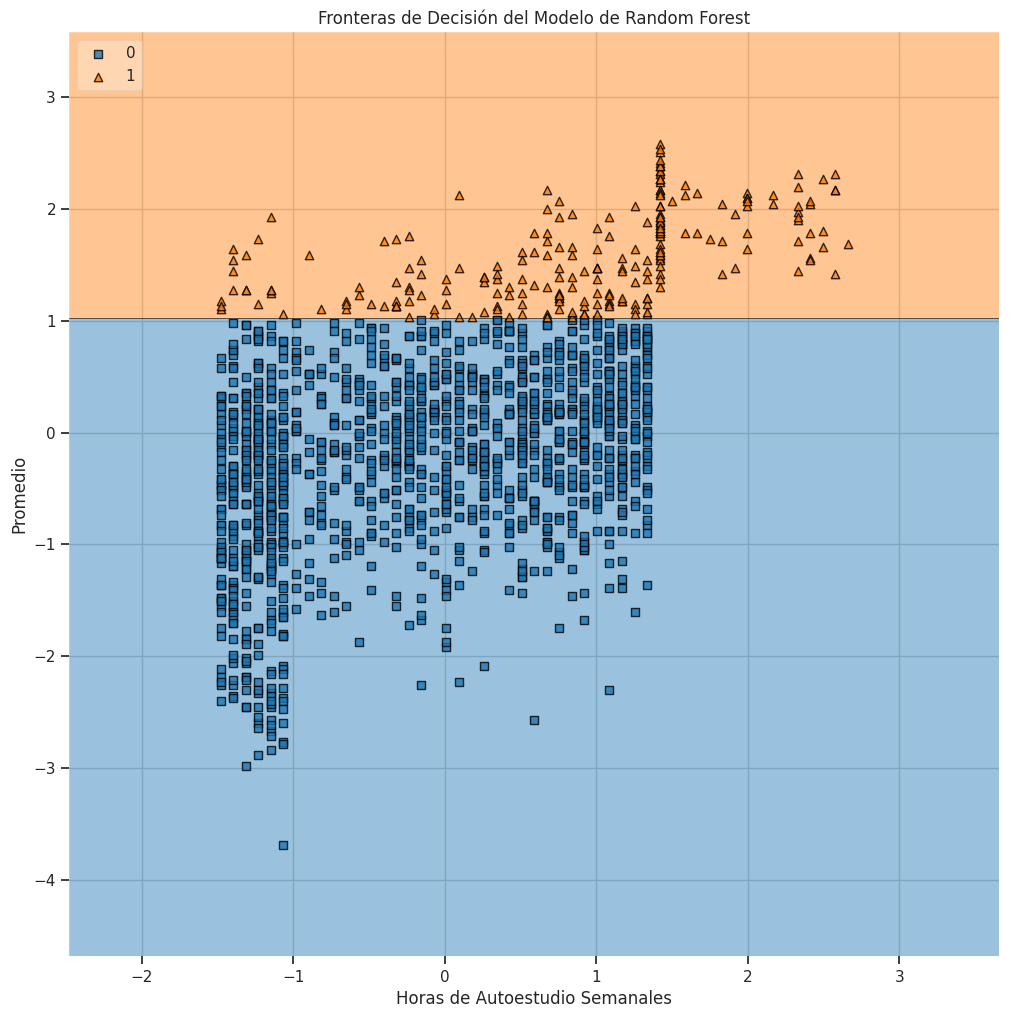

weekly_self_study_hours: 0.17872705912324488
promedio: 0.8212729408767552


In [ ]:
#RANDOM FOREST
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions


# Variables independientes y dependientes  SACAR LA COLUMNA PROMEDIO
X = df_codificado[['weekly_self_study_hours','promedio']]

y = df_codificado['rendimiento']



# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo con 100 arboles
forest_rec = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
forest_rec.fit(X_train, y_train)


# Predecir en el conjunto de prueba
y_pred = forest_rec.predict(X_test)

# Configuro el tamaño de la figura
plt.figure(figsize=(12, 12))

# Visualización de las fronteras de decisión

plot_decision_regions(X_train, y_train.values, clf = forest_rec, legend=2)
plt.xlabel('Horas de Autoestudio Semanales')
plt.ylabel('Promedio')
plt.title('Fronteras de Decisión del Modelo de Random Forest')
plt.show()

# Importancia de las características
importancia = forest_rec.feature_importances_
feature_names = X.columns
for feature, importancia in zip(feature_names, importancia):
    print(f'{feature}: {importancia}')

El gráfico muestra la frontera de decisión del modelo Random Forest podemos ver que el modelo separa bien los datos, con la mayoría de los puntos clasificados correctamente en su respectiva región. Sin embargo, al igual que el árbol de decisión hay algunos puntos mal clasificados, como los puntos azules que están cerca de la línea de frontera en la región naranja y viseversa.

####**4. Comparación**

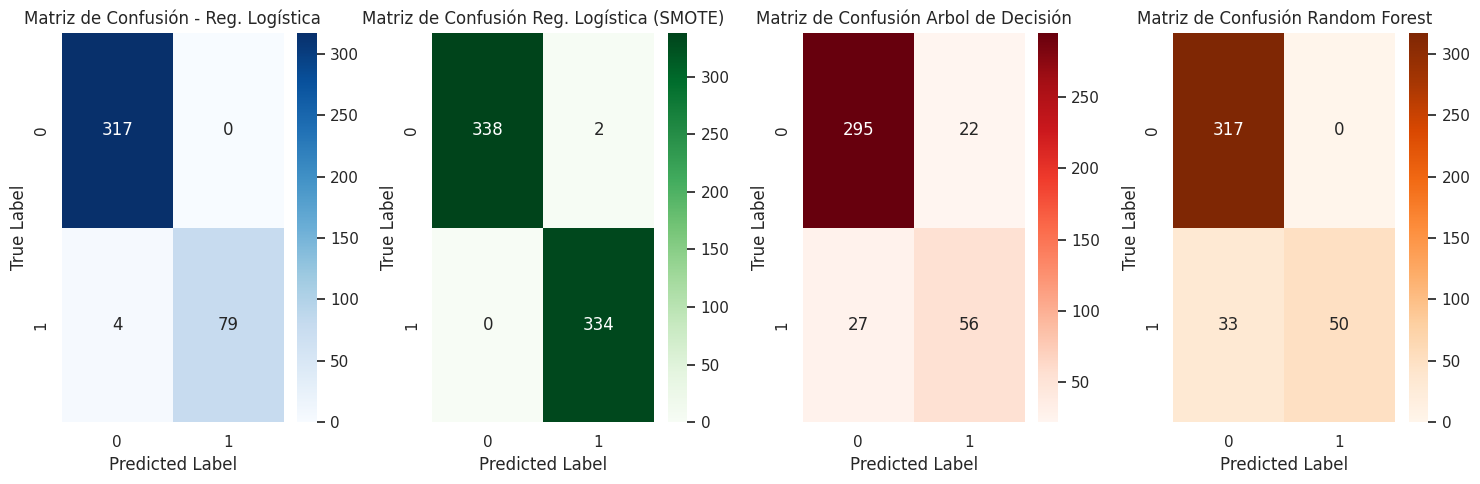

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figuras y ejes
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Matriz de confusión Regresión logística
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', ax=ax[0])
ax[0].set_title('Matriz de Confusión - Reg. Logística')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Matriz de confusión Regresión Logística (SMOTE)
sns.heatmap(cm2, annot=True, cmap='Greens', fmt='d', ax=ax[1])
ax[1].set_title('Matriz de Confusión Reg. Logística (SMOTE)')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

# Matriz de confusión Arbol de Decisión
sns.heatmap(cm3, annot=True, cmap='Reds', fmt='d', ax=ax[2])
ax[2].set_title('Matriz de Confusión Arbol de Decisión')
ax[2].set_xlabel('Predicted Label')
ax[2].set_ylabel('True Label')


# Matriz de confusión Random Forest
sns.heatmap(cm4, annot=True, cmap='Oranges', fmt='d', ax=ax[3])
ax[3].set_title('Matriz de Confusión Random Forest')
ax[3].set_xlabel('Predicted Label')
ax[3].set_ylabel('True Label')


plt.tight_layout()
plt.show()


El **árbol de desición** para mí fue el más sencillo de todos para predecir el rendimiento del alumno sin error. A pesar del desbalanceo en los datos fué más excato en la predicción. Quedará pendiente probar el modelo balanceando los datos.

Con **Random Forest** también predijo sin errores pero se usaron 100 árboles para llegar al mismmo resultado.
